# **계층적 군집분석**
- 군집분석은 분류를 위한 기준(y)이 없는 데이터셋에서 유사한 데이터끼리 그룹화하여 그 특징을 파악하는 비지도학습 방법.
- 계층적 군집 분석(Hierarchical Clustering)은 데이터 포인트를 순차적으로 병합하거나 분할하여 트리 구조(덴드로그램)를 형성하는 군집화 알고리즘
- 군집화의 결과를 계층적 관계로 표현하기 때문에, 클러스터 간의 상호 관계를 시각적으로 파악할 수 있음.
- 계층적 군집 분석은 크게 **병합형(Agglomerative)**과 분할형(Divisive) 두 가지 알고리즘이 있는데, 대체적으로 병합병을 사용함.
- 병합형 군집 분석은 모든 데이터 포인트를 개별 군집으로 시작하여, 가장 가까운 군집을 차례대로 병합해 나가는 방식

## 특징, 해당 알고리즘 선정 이유
- 클러스터 개수 미리 지정 불필요: 다른 군집화 알고리즘(K-Means 등)과 달리, 클러스터의 개수를 미리 지정하지 않고 군집화가 가능하며, 덴드로그램을 통해 적절한 개수를 찾을 수 있습니다.
- 계층적 관계 파악: 군집이 형성되는 과정에서 데이터 간의 계층적 관계를 확인할 수 있습니다.
- 소규모 데이터에 적합: 계층적 군집 분석은 데이터셋이 작은 경우 효과적입니다. 데이터가 많아질수록 계산 비용이 기하급수적으로 증가하므로, 큰 데이터셋에는 부적합할 수 있습니다.


## 연결법
-  계층적 군집 분석에서 군집 간의 거리를 측정하는 방법을 **연결법(linkage method)**이라고 함.
-  연결법에 따라 군집 간의 거리 계산 방식이 달라지며, 결과적인 군집화 성능에 큰 영향을 미침.
-  대표적인 연결법에는 단일 연결법, 완전 연결법, 평균연결법, 워드 방법(Ward's Method)이 있는데 해당 분석에서는 가장 일반적으로 많이 사용되는 ward 방법을 사용함.
-  해당 방법은 군집 간의 거리를 **제곱합의 총 변동(Sum of Squares)**을 최소화하는 방식으로 병합, 즉 군집 내의 분산이 가장 작아지는 방향으로 군집을 병합



In [1]:
import pandas as pd
# 데이터 불러오기
df = pd.read_csv('./00.Data/군집분석용_데이터.csv')
df

,지역,전체 빈집수,1등급(양호),2등급(일반),3등급(불량),4등급(철거대상),주거지역,상업지역,공업지역,녹지지역,관리지역,농림지역,자연환경보전지역,단독주택,공동주택,기타주택
0,광덕면,3,0,2,0,1,0,0,0,0,3,0,0,3,0,0
1,구룡동,2,0,1,0,1,0,0,0,2,0,0,0,2,0,0
2,구성동,5,0,4,0,1,4,0,0,1,0,0,0,5,0,0
3,다가동,17,2,6,7,2,17,0,0,0,0,0,0,9,8,0
4,동면,5,0,0,0,5,0,0,0,0,5,0,0,5,0,0
5,목천읍,7,3,2,1,1,1,0,0,0,6,0,0,7,0,0
6,문화동,17,0,7,6,4,2,15,0,0,0,0,0,17,0,0
7,병천면,20,4,7,6,3,3,0,0,0,17,0,0,20,0,0
8,봉명동,18,5,11,1,1,15,2,0,1,0,0,0,15,3,0
9,북면,34,24,2,8,0,0,0,0,0,34,0,0,8,26,0


In [25]:
from scipy.stats import pearsonr
# 분석 변수
columns = ['전체 빈집수', '주거지역', '상업지역', '공업지역', '녹지지역', '관리지역']

# 상관행렬
df_corr = df[columns].corr()

# p value 데이터 프레임 초기화
p_values = pd.DataFrame(index=columns, columns=columns)

# 피어슨 상관계수와 p값 계산
for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            corr, p_value = pearsonr(df[col1].dropna(), df[col2].dropna())
            p_values.loc[col1, col2] = p_value
        else:
            p_values.loc[col1, col2] = 0  # 자기 자신은 0

# p값 확인
p_values

,전체 빈집수,주거지역,상업지역,공업지역,녹지지역,관리지역
전체 빈집수,0,0.000601,0.419272,0.036456,0.001499,0.000617
주거지역,0.000601,0,0.60694,0.858079,0.984056,0.34608
상업지역,0.419272,0.60694,0,0.71247,0.446441,0.296866
공업지역,0.036456,0.858079,0.71247,0,0.000001,0.964362
녹지지역,0.001499,0.984056,0.446441,0.000001,0,0.585685
관리지역,0.000617,0.34608,0.296866,0.964362,0.585685,0


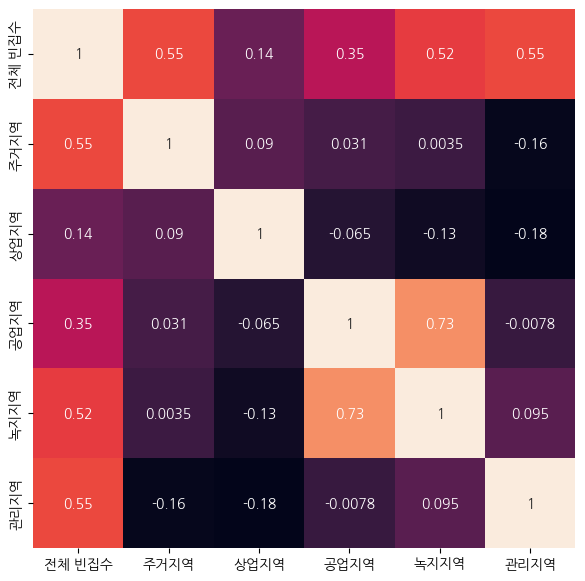

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
df_corr = df[['전체 빈집수','주거지역','상업지역','공업지역','녹지지역','관리지역']].corr()
plt.figure(figsize=(7, 7))
sns.heatmap(df_corr, annot=True,cbar=False)
plt.show()
#plt.savefig('용도지역_빈집수_상관관계분석.png')

In [3]:
# 주거 목적으로 활용가능한 등급의 빈집 수 확인
df['활용가능등급']  = df['1등급(양호)'] + df['2등급(일반)']

In [4]:
df_set_idx = df.set_index('지역')

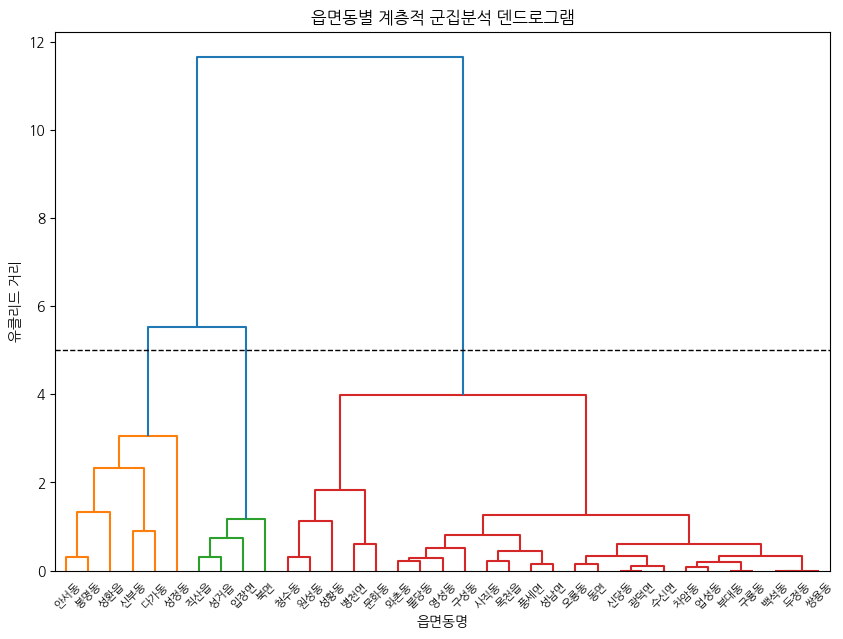

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# 데이터 스케일링
features = ['전체 빈집수', '활용가능등급','주거지역']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 계층적 군집분석 수행
linked = linkage(X_scaled, method='ward')

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
plt.rcParams['font.family'] = 'NanumGothic'
max_d = 5
dendrogram(linked, labels=df_set_idx.index, orientation='top', distance_sort='descending', show_leaf_counts=True, color_threshold=max_d)
plt.axhline(y=max_d, c='k', linestyle='--', lw=1)
plt.title('읍면동별 계층적 군집분석 덴드로그램')
plt.xlabel('읍면동명')
plt.ylabel('유클리드 거리')
plt.show()

In [6]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 10):
    cluster_labels = fcluster(linked, n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"클러스터 수: {n_clusters}, 실루엣 계수: {silhouette_avg}")

클러스터 수: 2, 실루엣 계수: 0.6328719186445605
클러스터 수: 3, 실루엣 계수: 0.6475190080264124
클러스터 수: 4, 실루엣 계수: 0.5694797382121247
클러스터 수: 5, 실루엣 계수: 0.5724834198546708
클러스터 수: 6, 실루엣 계수: 0.5733446954285983
클러스터 수: 7, 실루엣 계수: 0.5852355590180577
클러스터 수: 8, 실루엣 계수: 0.5681034048330957
클러스터 수: 9, 실루엣 계수: 0.36919856098752885


In [7]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

# 덴드로그램에서 임의의 거리 기준으로 클러스터 형성
n_clusters = 3  # 원하는 클러스터 개수
cluster_labels = fcluster(linked, n_clusters, criterion='maxclust')

# 실루엣 계수 계산
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f'클러스터 수가 {n_clusters} 일때 실루엣 계수: {silhouette_avg}')

클러스터 수가 3 일때 실루엣 계수: 0.6475190080264124


In [8]:
df['클러스터'] = cluster_labels
grouped = df.groupby('클러스터')[['전체 빈집수', '활용가능등급','3등급(불량)','4등급(철거대상)','주거지역','상업지역','공업지역','녹지지역','관리지역',
                              '농림지역','자연환경보전지역','단독주택','공동주택','기타주택']].mean().round(2)

grouped

,전체 빈집수,활용가능등급,3등급(불량),4등급(철거대상),주거지역,상업지역,공업지역,녹지지역,관리지역,농림지역,자연환경보전지역,단독주택,공동주택,기타주택
클러스터,,,,,,,,,,,,,,
1,5.32,3.00,1.16,1.16,1.84,1.24,0.0,0.44,1.76,0.0,0.0,4.88,0.36,0.08
2,32.00,22.75,6.25,3.00,3.75,0.00,0.5,11.75,15.25,0.5,0.0,16.75,14.75,0.50
3,21.00,14.83,3.50,2.67,17.67,1.00,0.0,0.50,1.83,0.0,0.0,11.67,9.00,0.33


In [9]:
## 1. 빈집수 적고, 활용가능 빈집 수 대체적으로 적음
## 2. 빈집수 29~34, 활용가능 등급 수도 많음. 다만 관리지역이나, 녹지지역의 빈집인 경우가 많음
## 3. 빈집수 17~ 31, 황용가능 등급 비중 높음. 대다수 주거지역임.

In [10]:
#df.to_csv('./00.Data/군집분석_최종.csv',index=False)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# 데이터 스케일링
features = ['전체 빈집수', '활용가능등급','주거지역']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 계층적 군집분석 수행
linked = linkage(X_scaled, method='ward')

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
plt.rcParams['font.family'] = 'NanumGothic'
max_d = 5
dendrogram(linked, labels=df_set_idx.index, orientation='top', distance_sort='descending', show_leaf_counts=True, color_threshold=max_d)
plt.axhline(y=max_d, c='k', linestyle='--', lw=1)
plt.title('읍면동별 계층적 군집분석 덴드로그램')
plt.xlabel('읍면동명')
plt.ylabel('유클리드 거리')
plt.show()